# Building Load Alignment 
Generates graphic showing how electrical and natrual gas load peaks ofen conincede with one another in residential buildings. 
Data taken from: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime

In [2]:
def get_data(filepath):
    df = pd.read_csv(filepath)
    df = df[[
        "timestamp",
        "out.electricity.total.energy_consumption.kwh",
        "out.natural_gas.total.energy_consumption.kwh",
        # "out.load.heating.energy_delivered.kbtu",
        # "out.load.hot_water.energy_delivered.kbtu",
    ]]
    df = df.rename(columns={
        "out.electricity.total.energy_consumption.kwh":"Electricity Load",
        "out.natural_gas.total.energy_consumption.kwh":"Natural Gas Load",
    })
    df["Electricity Load"] = df["Electricity Load"] * 4 # 15min intervals given in kwh
    df["Natural Gas Load"] = df["Natural Gas Load"] * 4 # 15min intervals given in kwh
    df.index = pd.DatetimeIndex(df["timestamp"])
    df = df.drop("timestamp", axis=1)
    return df

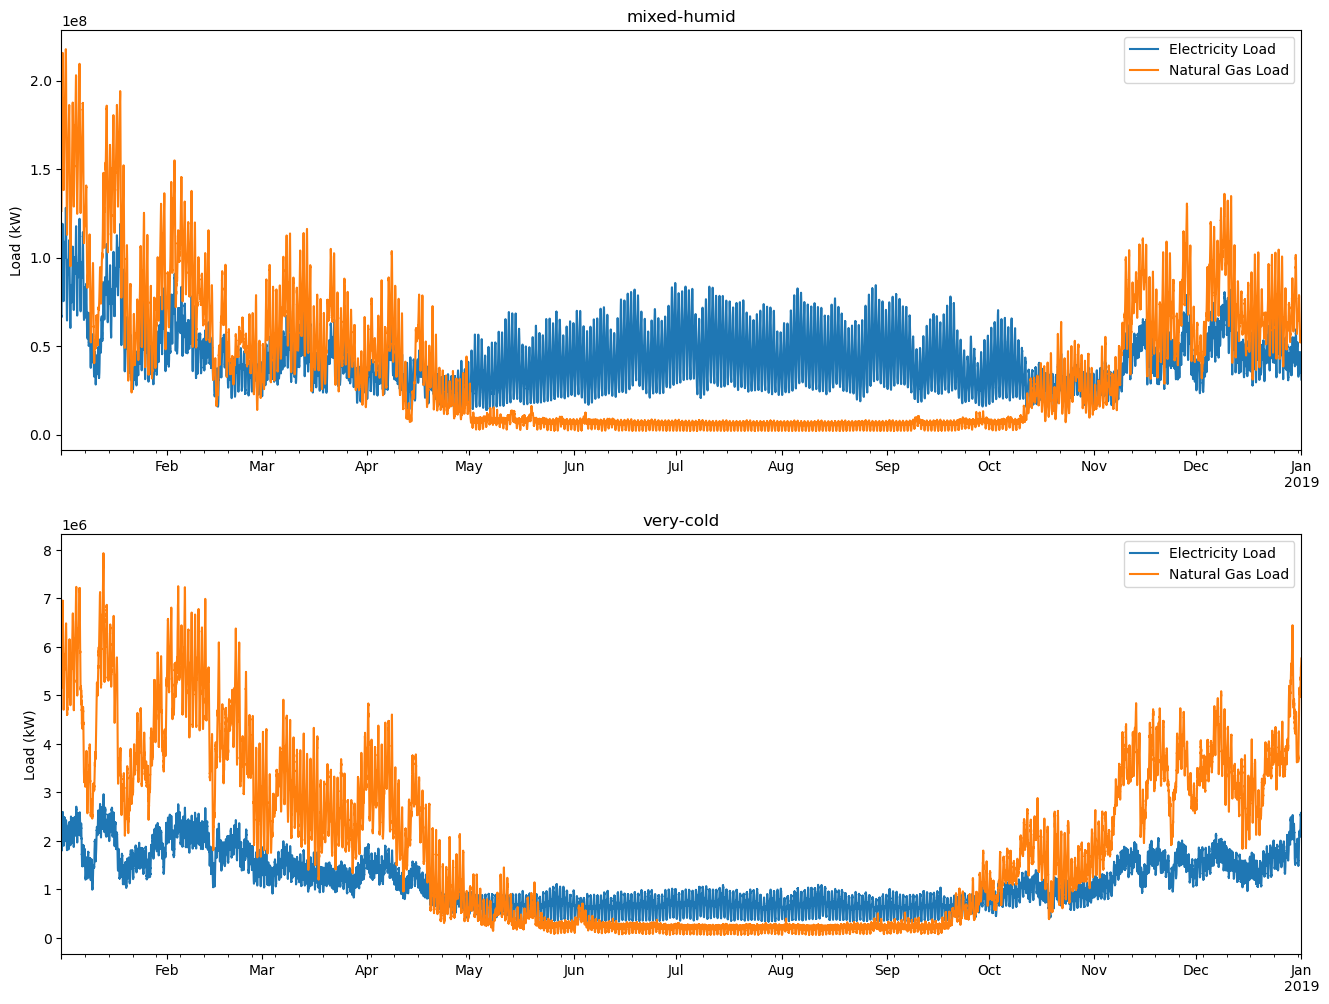

In [4]:
fig, axs = plt.subplots(2,1, figsize=(16, 12))

ax_num = 0
for filepath in os.listdir("../../data/single-family-detached/"):
    df = get_data(f"../../data/single-family-detached/{filepath}")
    df.plot(
        ax=axs[ax_num],
        title=filepath[:-4],
        xlabel="",
        ylabel="Load (kW)")
    axs[ax_num].legend(title="", loc="upper right")
    ax_num += 1
    

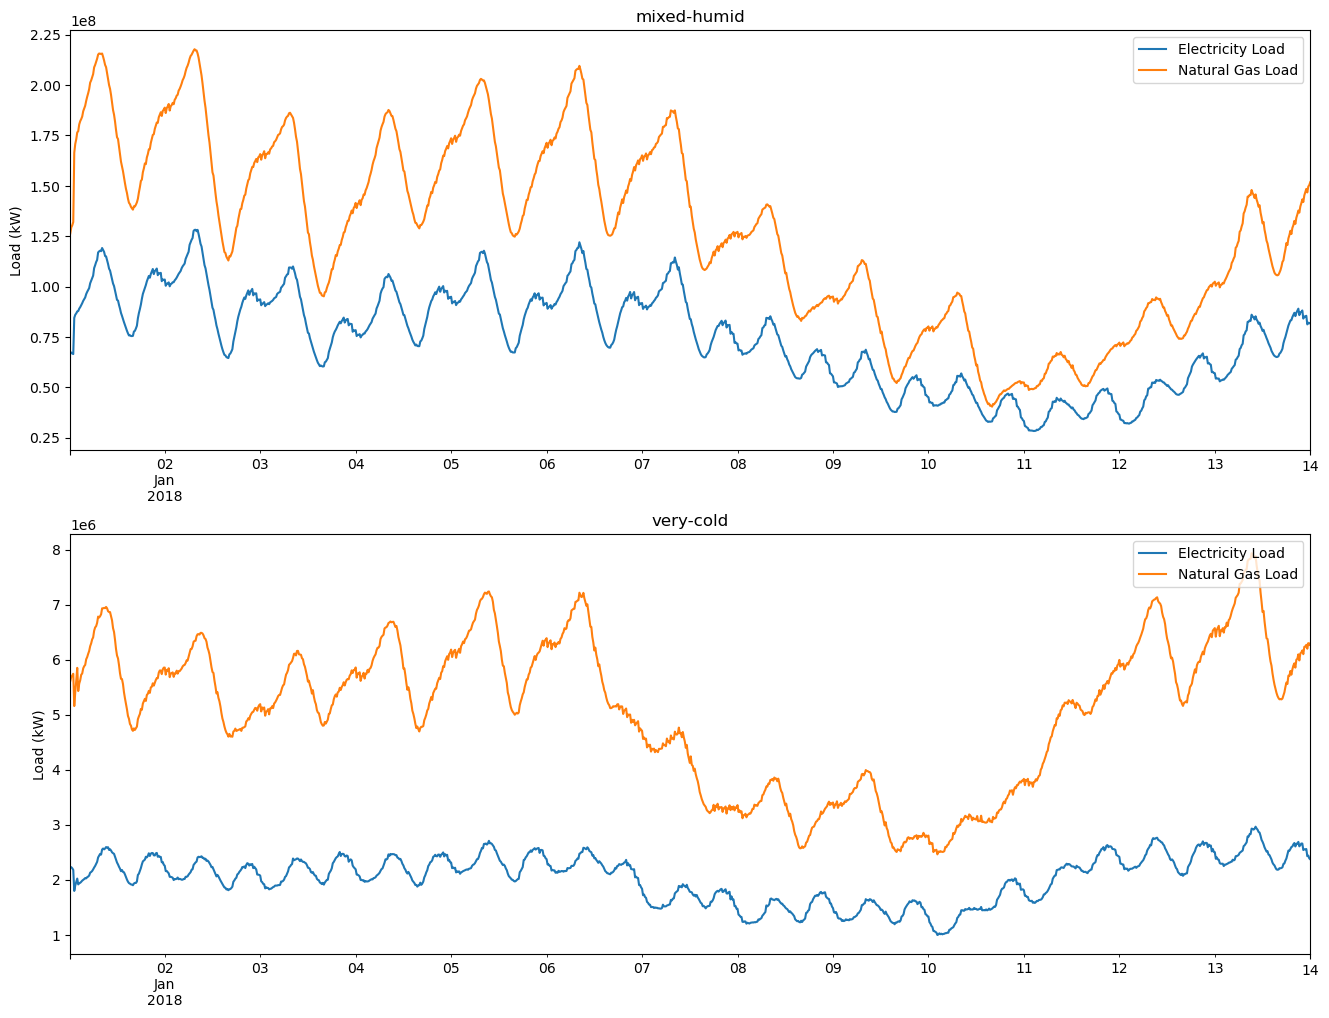

In [5]:
fig, axs = plt.subplots(2,1, figsize=(16, 12))

ax_num = 0
for filepath in os.listdir("../../data/single-family-detached/"):
    df = get_data(f"../../data/single-family-detached/{filepath}")
    df = df.loc[datetime.date(year=2018,month=1,day=1):datetime.date(year=2018,month=1,day=14)]
    df.plot(
        ax=axs[ax_num],
        title=filepath[:-4],
        xlabel="",
        ylabel="Load (kW)")
    axs[ax_num].legend(title="", loc="upper right")
    ax_num += 1
    

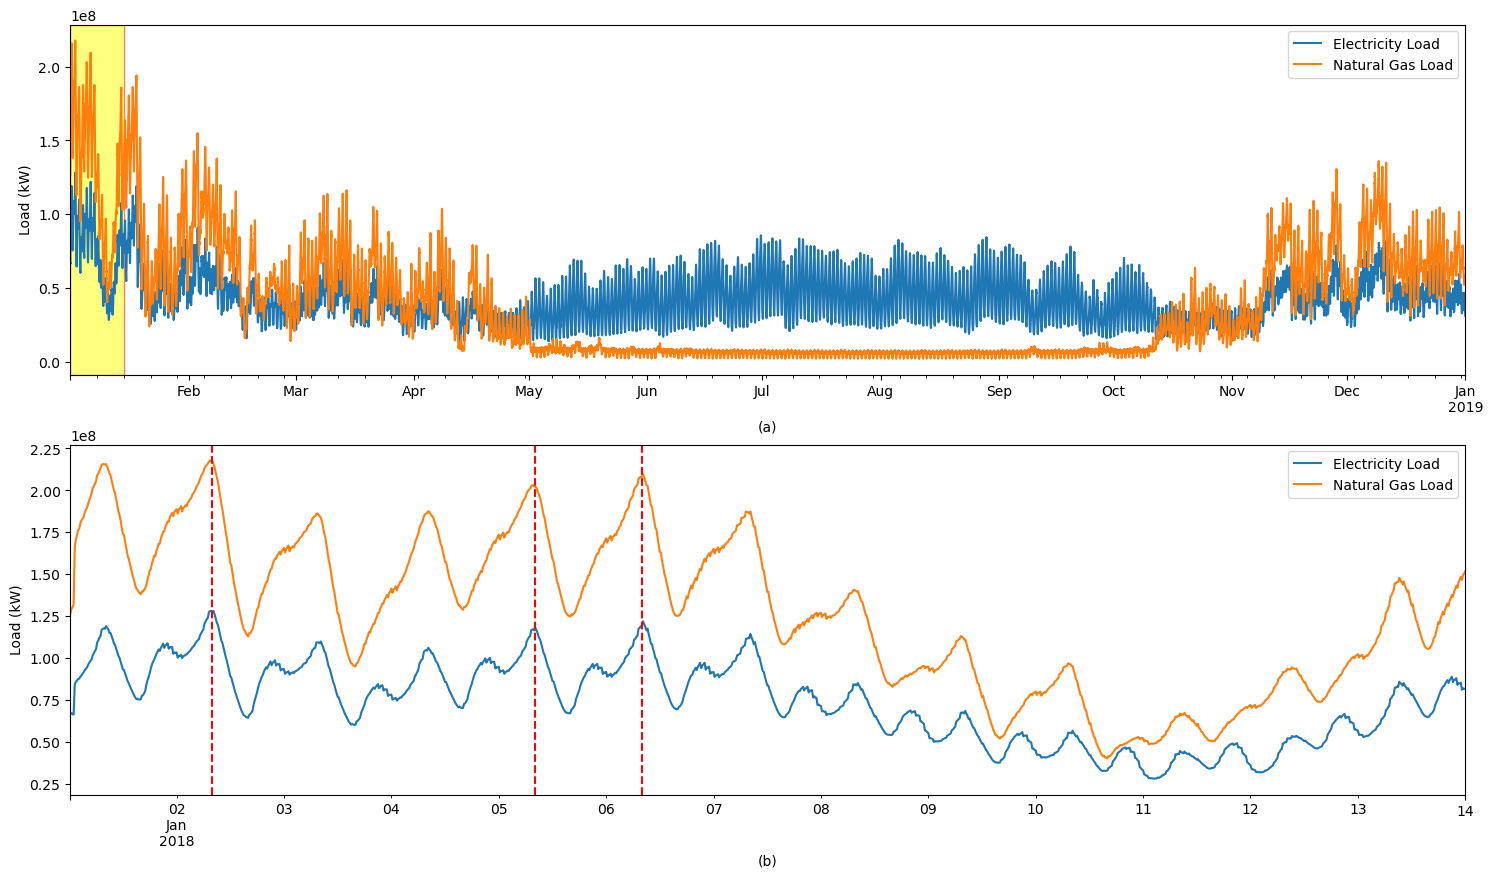

In [6]:
fig, axs = plt.subplots(2,1, figsize=(18, 10))
df = get_data(f"../../data/single-family-detached/mixed-humid.csv")

year = df.copy()
week = df.loc[datetime.date(year=2018,month=1,day=1):datetime.date(year=2018,month=1,day=14)]

year.plot(
    ax=axs[0],
    xlabel="(a)",
    ylabel="Load (kW)")

week.plot(
    ax=axs[1],
    xlabel="(b)",
    ylabel="Load (kW)")

axs[0].axvspan(datetime.datetime(2018, 1, 1), datetime.datetime(2018, 1, 15), facecolor='yellow', alpha=0.5, hatch='', edgecolor='red', linewidth=1)
axs[1].axvline(x=datetime.datetime(2018, 1, 2, 8), color="r", linestyle="--")
axs[1].axvline(x=datetime.datetime(2018, 1, 5, 8), color="r", linestyle="--")
axs[1].axvline(x=datetime.datetime(2018, 1, 6, 8), color="r", linestyle="--")

fig.savefig("figures/res-load-profile.png", dpi=400, bbox_inches='tight')